In [1]:
'Baby presence detection with obstructions like Sunscreen and Blanket'

'Baby presence detection with obstructions like Sunscreen and Blanket'

In [2]:
import gc
gc.collect()

3

In [3]:
%reset -f

In [4]:
# Import every packages for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Add measurements for withoutbaby

In [5]:
import numpy as np
import pandas as pd
import os 
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
#file_path = 'Carrierseat_withoutbaby_npy_array_Lowpassfiltered_label_0.npy'

# Path to the file (same as used when saving)
file_path = os.path.join("..", "..", "Data", "Processed",
    "CarrierSeat_withoutBaby_Lowpassfilered_Label_0.npy")


# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withoutbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [6]:
num_rows_withoutbaby = len(dataframe_withoutbaby)
num_rows_withoutbaby

25000

In [7]:
fft_magnitudes_withoutbaby = dataframe_withoutbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withoutbaby

array([104749.36665761,  52421.28276004,   2858.08099686, ...,
         2785.14620296,   2858.08099686,  52421.28276004], shape=(25000,))

In [8]:
fft_frequencies_withoutbaby = dataframe_withoutbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withoutbaby

array([   0.   ,   78.125,  156.25 , ..., -234.375, -156.25 ,  -78.125],
      shape=(25000,))

In [9]:
fft_phase_withoutbaby = dataframe_withoutbaby["Phase"].values  # Convert to NumPy array
fft_phase_withoutbaby

array([ 0.        , -3.13045712,  1.6300633 , ...,  0.99740917,
       -1.6300633 ,  3.13045712], shape=(25000,))

In [10]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }


In [11]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [12]:

# Extract features for fft_withoutbaby
reference_features_withoutbaby = extract_features(fft_frequencies_withoutbaby, fft_magnitudes_withoutbaby, fft_phase_withoutbaby)
reference_features_withoutbaby



{'mean_fft': np.float64(923.9775302360855),
 'std_fft': np.float64(981.478039746996),
 'max_fft': np.float64(104749.36665761432),
 'min_fft': np.float64(0.9930308466425066),
 'median_fft': np.float64(811.7366984954034),
 'sum_fft': np.float64(23099438.255902138),
 'spectral_entropy': np.float64(9.920158431589652),
 'spectral_centroid': np.float64(-9.408936402178371),
 'spectral_bandwidth': np.float64(580645.5976533873),
 'spectral_flatness': np.float64(0.8088751643459555),
 'phase_variance': np.float64(3.296413078787201),
 'phase_mean': np.float64(5.2295945351943375e-17),
 'phase_diff': np.float64(0.00012522329371768507)}

In [13]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withoutbaby = len(dataframe_withoutbaby)
perturbed_withoutbaby_df = add_perturbation(reference_features_withoutbaby, num_rows_withoutbaby, perturb_range=0.03)
perturbed_withoutbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,945.583010,980.126308,102332.331881,0.970799,811.962070,2.313086e+07,10.114671,-9.616944,578588.615467,0.831930,3.382215,5.147827e-17,0.000128
1,923.072575,953.060532,104305.423487,0.970789,805.263564,2.368268e+07,10.150528,-9.625033,590142.948552,0.801256,3.271457,5.280010e-17,0.000123
2,898.147168,1005.476903,102376.971041,0.983720,816.479178,2.331983e+07,10.071011,-9.448660,576804.024543,0.804053,3.361590,5.140510e-17,0.000128
3,898.222652,983.870822,104211.463244,0.988220,820.941662,2.244188e+07,10.038435,-9.327300,590322.046495,0.828605,3.370942,5.351605e-17,0.000126
4,944.383162,1007.319892,107436.833926,0.982259,835.609131,2.291986e+07,9.625173,-9.437340,574821.322613,0.785846,3.282156,5.139800e-17,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,951.144106,953.366272,104841.668185,0.974428,804.157679,2.279110e+07,9.850751,-9.216687,571132.262212,0.803998,3.303286,5.309268e-17,0.000126
24996,938.417678,993.606168,102802.385943,0.970481,799.946471,2.369769e+07,9.830728,-9.128257,594003.745072,0.796777,3.296286,5.270110e-17,0.000122
24997,932.597363,1009.556295,101952.128750,1.020099,801.531908,2.266167e+07,9.971613,-9.651823,569836.788741,0.798092,3.242996,5.346332e-17,0.000126
24998,947.913313,963.420303,103385.438801,0.991914,832.418145,2.371464e+07,9.962072,-9.518078,575713.880586,0.785055,3.306389,5.266027e-17,0.000126


In [14]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [15]:
len(perturbed_withoutbaby_df),len(dataframe_withoutbaby)

(25000, 25000)

In [16]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withoutbaby) != len(perturbed_withoutbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withoutbaby_withfeatures = pd.concat([dataframe_withoutbaby, perturbed_withoutbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000,104749.366658,0.000000,0.0,945.583010,980.126308,102332.331881,0.970799,811.962070,2.313086e+07,10.114671,-9.616944,578588.615467,0.831930,3.382215,5.147827e-17,0.000128
1,78.125,52421.282760,-3.130457,0.0,923.072575,953.060532,104305.423487,0.970789,805.263564,2.368268e+07,10.150528,-9.625033,590142.948552,0.801256,3.271457,5.280010e-17,0.000123
2,156.250,2858.080997,1.630063,0.0,898.147168,1005.476903,102376.971041,0.983720,816.479178,2.331983e+07,10.071011,-9.448660,576804.024543,0.804053,3.361590,5.140510e-17,0.000128
3,234.375,2785.146203,-0.997409,0.0,898.222652,983.870822,104211.463244,0.988220,820.941662,2.244188e+07,10.038435,-9.327300,590322.046495,0.828605,3.370942,5.351605e-17,0.000126
4,312.500,1836.985949,2.804369,0.0,944.383162,1007.319892,107436.833926,0.982259,835.609131,2.291986e+07,9.625173,-9.437340,574821.322613,0.785846,3.282156,5.139800e-17,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0,951.144106,953.366272,104841.668185,0.974428,804.157679,2.279110e+07,9.850751,-9.216687,571132.262212,0.803998,3.303286,5.309268e-17,0.000126
24996,-312.500,1836.985949,-2.804369,0.0,938.417678,993.606168,102802.385943,0.970481,799.946471,2.369769e+07,9.830728,-9.128257,594003.745072,0.796777,3.296286,5.270110e-17,0.000122
24997,-234.375,2785.146203,0.997409,0.0,932.597363,1009.556295,101952.128750,1.020099,801.531908,2.266167e+07,9.971613,-9.651823,569836.788741,0.798092,3.242996,5.346332e-17,0.000126
24998,-156.250,2858.080997,-1.630063,0.0,947.913313,963.420303,103385.438801,0.991914,832.418145,2.371464e+07,9.962072,-9.518078,575713.880586,0.785055,3.306389,5.266027e-17,0.000126


# Withbaby covered with blanket and sunscreen measurements 

In [17]:
import numpy as np
import pandas as pd
import os

# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = os.path.join("..", "..", "Data", "Processed",
    "BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy")

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,48274.236998,0.000000,1.0
1,162.760417,24941.596497,-3.088069,1.0
2,325.520833,1716.246635,0.987059,1.0
3,488.281250,759.834659,-1.668255,1.0
4,651.041667,1026.975587,2.278972,1.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [18]:
num_rows_withbaby = len(dataframe_withbaby)
num_rows_withbaby

12000

In [19]:
fft_magnitudes_withbaby = dataframe_withbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withbaby

array([48274.23699804, 24941.59649665,  1716.24663508, ...,
         759.83465866,  1716.24663508, 24941.59649665], shape=(12000,))

In [20]:
fft_frequencies_withbaby = dataframe_withbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withbaby

array([   0.        ,  162.76041667,  325.52083333, ..., -488.28125   ,
       -325.52083333, -162.76041667], shape=(12000,))

In [21]:
fft_phase_withbaby = dataframe_withbaby["Phase"].values  # Convert to NumPy array
fft_phase_withbaby

array([ 0.        , -3.08806921,  0.98705878, ...,  1.66825465,
       -0.98705878,  3.08806921], shape=(12000,))

In [22]:
# Extract features for fft_withbaby
reference_features_withbaby = extract_features(fft_frequencies_withbaby, fft_magnitudes_withbaby, fft_phase_withbaby)
reference_features_withbaby



{'mean_fft': np.float64(539.3153031280609),
 'std_fft': np.float64(624.5127144952429),
 'max_fft': np.float64(48274.23699803697),
 'min_fft': np.float64(4.254391050121097),
 'median_fft': np.float64(478.6752374645231),
 'sum_fft': np.float64(6471783.637536731),
 'spectral_entropy': np.float64(9.177761059479113),
 'spectral_centroid': np.float64(-59.48645822846447),
 'spectral_bandwidth': np.float64(567668.4758818537),
 'spectral_flatness': np.float64(0.8096637590819117),
 'phase_variance': np.float64(3.267537662509709),
 'phase_mean': np.float64(2.960594732333751e-17),
 'phase_diff': np.float64(0.0002573605476758946)}

In [23]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withbaby = len(dataframe_withbaby)
perturbed_withbaby_df = add_perturbation(reference_features_withbaby, num_rows_withbaby, perturb_range=0.03)
perturbed_withbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,548.451530,637.073290,48805.320613,4.259626,471.469336,6.485500e+06,9.174841,-58.363548,564898.194941,0.795990,3.264934,2.959322e-17,0.000265
1,535.800002,642.326081,47761.076563,4.269184,483.439380,6.318957e+06,9.140122,-60.270324,582584.123888,0.807738,3.285890,3.021172e-17,0.000250
2,540.524741,635.003982,47866.050921,4.142741,477.075471,6.656285e+06,9.085762,-61.084467,571261.099454,0.806863,3.259774,2.979048e-17,0.000260
3,530.947792,634.364909,48387.220110,4.291284,469.059463,6.518727e+06,9.247800,-59.663388,554152.845823,0.813522,3.195351,3.017486e-17,0.000259
4,528.901457,614.035663,47240.889823,4.364641,470.705646,6.429789e+06,9.359397,-60.649113,572777.192120,0.832857,3.170089,2.949698e-17,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,524.047218,617.460026,48725.062628,4.310861,478.457957,6.406946e+06,9.335095,-59.037314,570894.904122,0.789512,3.184503,3.004696e-17,0.000253
11996,532.981184,634.576697,48983.230509,4.381580,471.582364,6.296280e+06,9.064461,-60.996161,551628.080117,0.805885,3.179829,2.992629e-17,0.000258
11997,526.213297,615.527038,49411.392125,4.201878,468.417110,6.364526e+06,9.342014,-59.157647,555650.268083,0.798295,3.223634,2.889237e-17,0.000263
11998,550.367549,621.407926,48111.790121,4.154250,471.418244,6.635391e+06,9.034715,-61.023587,557639.954175,0.789621,3.322887,2.942079e-17,0.000262


In [24]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,48274.236998,0.000000,1.0
1,162.760417,24941.596497,-3.088069,1.0
2,325.520833,1716.246635,0.987059,1.0
3,488.281250,759.834659,-1.668255,1.0
4,651.041667,1026.975587,2.278972,1.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [25]:
len(perturbed_withbaby_df),len(dataframe_withbaby)

(12000, 12000)

In [26]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withbaby) != len(perturbed_withbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withbaby_withfeatures = pd.concat([dataframe_withbaby, perturbed_withbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,48274.236998,0.000000,1.0,548.451530,637.073290,48805.320613,4.259626,471.469336,6.485500e+06,9.174841,-58.363548,564898.194941,0.795990,3.264934,2.959322e-17,0.000265
1,162.760417,24941.596497,-3.088069,1.0,535.800002,642.326081,47761.076563,4.269184,483.439380,6.318957e+06,9.140122,-60.270324,582584.123888,0.807738,3.285890,3.021172e-17,0.000250
2,325.520833,1716.246635,0.987059,1.0,540.524741,635.003982,47866.050921,4.142741,477.075471,6.656285e+06,9.085762,-61.084467,571261.099454,0.806863,3.259774,2.979048e-17,0.000260
3,488.281250,759.834659,-1.668255,1.0,530.947792,634.364909,48387.220110,4.291284,469.059463,6.518727e+06,9.247800,-59.663388,554152.845823,0.813522,3.195351,3.017486e-17,0.000259
4,651.041667,1026.975587,2.278972,1.0,528.901457,614.035663,47240.889823,4.364641,470.705646,6.429789e+06,9.359397,-60.649113,572777.192120,0.832857,3.170089,2.949698e-17,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0,524.047218,617.460026,48725.062628,4.310861,478.457957,6.406946e+06,9.335095,-59.037314,570894.904122,0.789512,3.184503,3.004696e-17,0.000253
11996,-651.041667,1026.975587,-2.278972,1.0,532.981184,634.576697,48983.230509,4.381580,471.582364,6.296280e+06,9.064461,-60.996161,551628.080117,0.805885,3.179829,2.992629e-17,0.000258
11997,-488.281250,759.834659,1.668255,1.0,526.213297,615.527038,49411.392125,4.201878,468.417110,6.364526e+06,9.342014,-59.157647,555650.268083,0.798295,3.223634,2.889237e-17,0.000263
11998,-325.520833,1716.246635,-0.987059,1.0,550.367549,621.407926,48111.790121,4.154250,471.418244,6.635391e+06,9.034715,-61.023587,557639.954175,0.789621,3.322887,2.942079e-17,0.000262


In [27]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [28]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,48274.236998,0.000000,1.0
1,162.760417,24941.596497,-3.088069,1.0
2,325.520833,1716.246635,0.987059,1.0
3,488.281250,759.834659,-1.668255,1.0
4,651.041667,1026.975587,2.278972,1.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [29]:
# Vertical concatenation
dataset_2_rawdata = pd.concat([dataframe_withoutbaby,dataframe_withbaby])
dataset_2_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,104749.366658,0.000000,0.0
1,78.125000,52421.282760,-3.130457,0.0
2,156.250000,2858.080997,1.630063,0.0
3,234.375000,2785.146203,-0.997409,0.0
4,312.500000,1836.985949,2.804369,0.0
...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0
11996,-651.041667,1026.975587,-2.278972,1.0
11997,-488.281250,759.834659,1.668255,1.0
11998,-325.520833,1716.246635,-0.987059,1.0


In [30]:
# Resetting the index if unique indices are needed
dataset_2_rawdata = dataset_2_rawdata.reset_index(drop=True)
dataset_2_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,104749.366658,0.000000,0.0
1,78.125000,52421.282760,-3.130457,0.0
2,156.250000,2858.080997,1.630063,0.0
3,234.375000,2785.146203,-0.997409,0.0
4,312.500000,1836.985949,2.804369,0.0
...,...,...,...,...
36995,-813.802083,1362.883093,0.664906,1.0
36996,-651.041667,1026.975587,-2.278972,1.0
36997,-488.281250,759.834659,1.668255,1.0
36998,-325.520833,1716.246635,-0.987059,1.0


In [31]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,48274.236998,0.000000,1.0,548.451530,637.073290,48805.320613,4.259626,471.469336,6.485500e+06,9.174841,-58.363548,564898.194941,0.795990,3.264934,2.959322e-17,0.000265
1,162.760417,24941.596497,-3.088069,1.0,535.800002,642.326081,47761.076563,4.269184,483.439380,6.318957e+06,9.140122,-60.270324,582584.123888,0.807738,3.285890,3.021172e-17,0.000250
2,325.520833,1716.246635,0.987059,1.0,540.524741,635.003982,47866.050921,4.142741,477.075471,6.656285e+06,9.085762,-61.084467,571261.099454,0.806863,3.259774,2.979048e-17,0.000260
3,488.281250,759.834659,-1.668255,1.0,530.947792,634.364909,48387.220110,4.291284,469.059463,6.518727e+06,9.247800,-59.663388,554152.845823,0.813522,3.195351,3.017486e-17,0.000259
4,651.041667,1026.975587,2.278972,1.0,528.901457,614.035663,47240.889823,4.364641,470.705646,6.429789e+06,9.359397,-60.649113,572777.192120,0.832857,3.170089,2.949698e-17,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0,524.047218,617.460026,48725.062628,4.310861,478.457957,6.406946e+06,9.335095,-59.037314,570894.904122,0.789512,3.184503,3.004696e-17,0.000253
11996,-651.041667,1026.975587,-2.278972,1.0,532.981184,634.576697,48983.230509,4.381580,471.582364,6.296280e+06,9.064461,-60.996161,551628.080117,0.805885,3.179829,2.992629e-17,0.000258
11997,-488.281250,759.834659,1.668255,1.0,526.213297,615.527038,49411.392125,4.201878,468.417110,6.364526e+06,9.342014,-59.157647,555650.268083,0.798295,3.223634,2.889237e-17,0.000263
11998,-325.520833,1716.246635,-0.987059,1.0,550.367549,621.407926,48111.790121,4.154250,471.418244,6.635391e+06,9.034715,-61.023587,557639.954175,0.789621,3.322887,2.942079e-17,0.000262


In [32]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000,104749.366658,0.000000,0.0,945.583010,980.126308,102332.331881,0.970799,811.962070,2.313086e+07,10.114671,-9.616944,578588.615467,0.831930,3.382215,5.147827e-17,0.000128
1,78.125,52421.282760,-3.130457,0.0,923.072575,953.060532,104305.423487,0.970789,805.263564,2.368268e+07,10.150528,-9.625033,590142.948552,0.801256,3.271457,5.280010e-17,0.000123
2,156.250,2858.080997,1.630063,0.0,898.147168,1005.476903,102376.971041,0.983720,816.479178,2.331983e+07,10.071011,-9.448660,576804.024543,0.804053,3.361590,5.140510e-17,0.000128
3,234.375,2785.146203,-0.997409,0.0,898.222652,983.870822,104211.463244,0.988220,820.941662,2.244188e+07,10.038435,-9.327300,590322.046495,0.828605,3.370942,5.351605e-17,0.000126
4,312.500,1836.985949,2.804369,0.0,944.383162,1007.319892,107436.833926,0.982259,835.609131,2.291986e+07,9.625173,-9.437340,574821.322613,0.785846,3.282156,5.139800e-17,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0,951.144106,953.366272,104841.668185,0.974428,804.157679,2.279110e+07,9.850751,-9.216687,571132.262212,0.803998,3.303286,5.309268e-17,0.000126
24996,-312.500,1836.985949,-2.804369,0.0,938.417678,993.606168,102802.385943,0.970481,799.946471,2.369769e+07,9.830728,-9.128257,594003.745072,0.796777,3.296286,5.270110e-17,0.000122
24997,-234.375,2785.146203,0.997409,0.0,932.597363,1009.556295,101952.128750,1.020099,801.531908,2.266167e+07,9.971613,-9.651823,569836.788741,0.798092,3.242996,5.346332e-17,0.000126
24998,-156.250,2858.080997,-1.630063,0.0,947.913313,963.420303,103385.438801,0.991914,832.418145,2.371464e+07,9.962072,-9.518078,575713.880586,0.785055,3.306389,5.266027e-17,0.000126


In [33]:
# Vertical concatenation
dataset_2_withfeatures = pd.concat([dataframe_withoutbaby_withfeatures,dataframe_withbaby_withfeatures])
dataset_2_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,104749.366658,0.000000,0.0,945.583010,980.126308,102332.331881,0.970799,811.962070,2.313086e+07,10.114671,-9.616944,578588.615467,0.831930,3.382215,5.147827e-17,0.000128
1,78.125000,52421.282760,-3.130457,0.0,923.072575,953.060532,104305.423487,0.970789,805.263564,2.368268e+07,10.150528,-9.625033,590142.948552,0.801256,3.271457,5.280010e-17,0.000123
2,156.250000,2858.080997,1.630063,0.0,898.147168,1005.476903,102376.971041,0.983720,816.479178,2.331983e+07,10.071011,-9.448660,576804.024543,0.804053,3.361590,5.140510e-17,0.000128
3,234.375000,2785.146203,-0.997409,0.0,898.222652,983.870822,104211.463244,0.988220,820.941662,2.244188e+07,10.038435,-9.327300,590322.046495,0.828605,3.370942,5.351605e-17,0.000126
4,312.500000,1836.985949,2.804369,0.0,944.383162,1007.319892,107436.833926,0.982259,835.609131,2.291986e+07,9.625173,-9.437340,574821.322613,0.785846,3.282156,5.139800e-17,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,1362.883093,0.664906,1.0,524.047218,617.460026,48725.062628,4.310861,478.457957,6.406946e+06,9.335095,-59.037314,570894.904122,0.789512,3.184503,3.004696e-17,0.000253
11996,-651.041667,1026.975587,-2.278972,1.0,532.981184,634.576697,48983.230509,4.381580,471.582364,6.296280e+06,9.064461,-60.996161,551628.080117,0.805885,3.179829,2.992629e-17,0.000258
11997,-488.281250,759.834659,1.668255,1.0,526.213297,615.527038,49411.392125,4.201878,468.417110,6.364526e+06,9.342014,-59.157647,555650.268083,0.798295,3.223634,2.889237e-17,0.000263
11998,-325.520833,1716.246635,-0.987059,1.0,550.367549,621.407926,48111.790121,4.154250,471.418244,6.635391e+06,9.034715,-61.023587,557639.954175,0.789621,3.322887,2.942079e-17,0.000262


In [34]:
# Resetting the index if unique indices are needed
dataset_2_withfeatures = dataset_2_withfeatures.reset_index(drop=True)
dataset_2_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,104749.366658,0.000000,0.0,945.583010,980.126308,102332.331881,0.970799,811.962070,2.313086e+07,10.114671,-9.616944,578588.615467,0.831930,3.382215,5.147827e-17,0.000128
1,78.125000,52421.282760,-3.130457,0.0,923.072575,953.060532,104305.423487,0.970789,805.263564,2.368268e+07,10.150528,-9.625033,590142.948552,0.801256,3.271457,5.280010e-17,0.000123
2,156.250000,2858.080997,1.630063,0.0,898.147168,1005.476903,102376.971041,0.983720,816.479178,2.331983e+07,10.071011,-9.448660,576804.024543,0.804053,3.361590,5.140510e-17,0.000128
3,234.375000,2785.146203,-0.997409,0.0,898.222652,983.870822,104211.463244,0.988220,820.941662,2.244188e+07,10.038435,-9.327300,590322.046495,0.828605,3.370942,5.351605e-17,0.000126
4,312.500000,1836.985949,2.804369,0.0,944.383162,1007.319892,107436.833926,0.982259,835.609131,2.291986e+07,9.625173,-9.437340,574821.322613,0.785846,3.282156,5.139800e-17,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,-813.802083,1362.883093,0.664906,1.0,524.047218,617.460026,48725.062628,4.310861,478.457957,6.406946e+06,9.335095,-59.037314,570894.904122,0.789512,3.184503,3.004696e-17,0.000253
36996,-651.041667,1026.975587,-2.278972,1.0,532.981184,634.576697,48983.230509,4.381580,471.582364,6.296280e+06,9.064461,-60.996161,551628.080117,0.805885,3.179829,2.992629e-17,0.000258
36997,-488.281250,759.834659,1.668255,1.0,526.213297,615.527038,49411.392125,4.201878,468.417110,6.364526e+06,9.342014,-59.157647,555650.268083,0.798295,3.223634,2.889237e-17,0.000263
36998,-325.520833,1716.246635,-0.987059,1.0,550.367549,621.407926,48111.790121,4.154250,471.418244,6.635391e+06,9.034715,-61.023587,557639.954175,0.789621,3.322887,2.942079e-17,0.000262


# Training with rawdata

In [35]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Load your dataset (df_combined)
X = dataset_2_rawdata.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_rawdata['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for rawdata:\n", classification_report(y_test, y_pred))

Accuracy: 0.6758108108108108

Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.73      0.82      0.77      4978
         1.0       0.51      0.38      0.44      2422

    accuracy                           0.68      7400
   macro avg       0.62      0.60      0.60      7400
weighted avg       0.66      0.68      0.66      7400



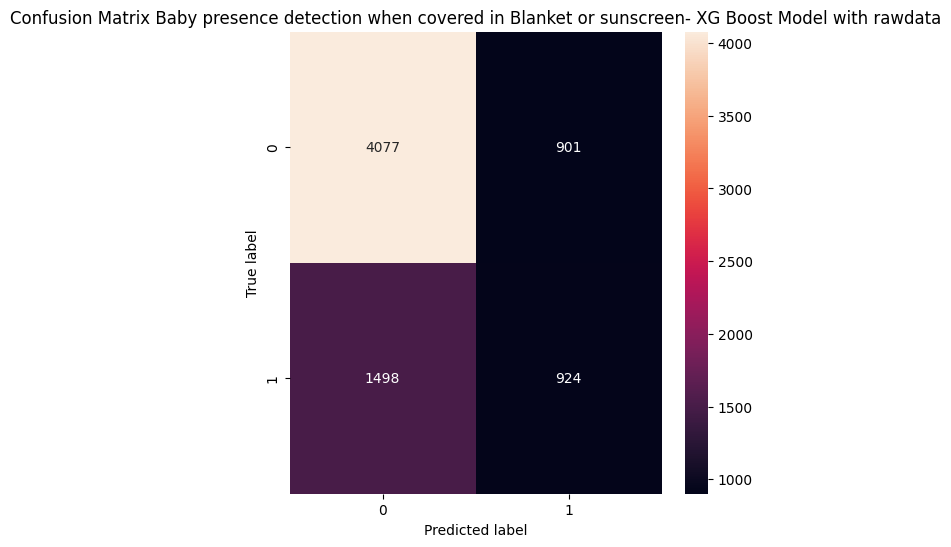

In [37]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen- XG Boost Model with rawdata')
plt.show()

# Training with extracted features

In [38]:
# XG Boost Model with extracted features data

In [39]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Load your dataset (df_combined)
X = dataset_2_withfeatures.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_withfeatures['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for extracted features data:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4978
         1.0       1.00      1.00      1.00      2422

    accuracy                           1.00      7400
   macro avg       1.00      1.00      1.00      7400
weighted avg       1.00      1.00      1.00      7400



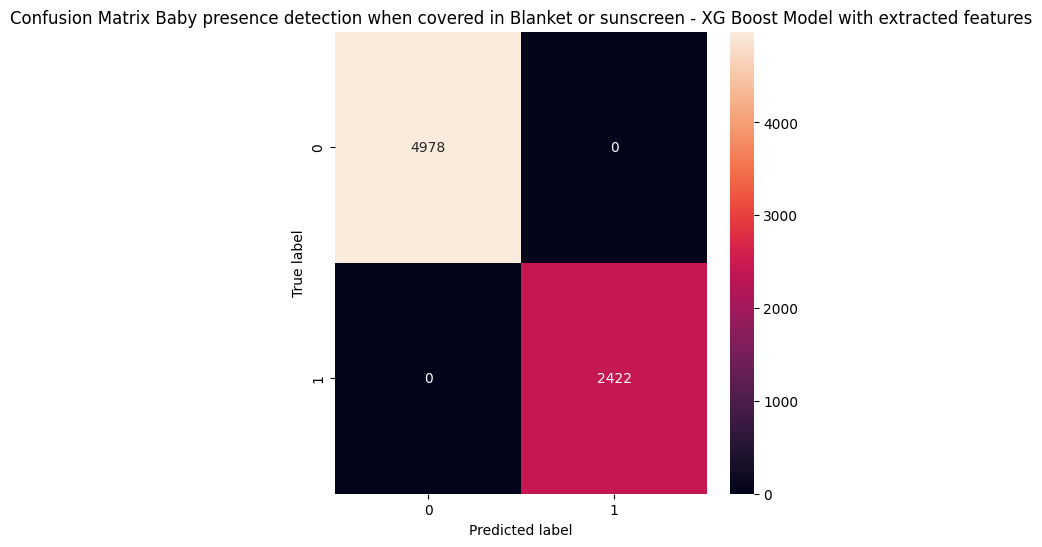

In [41]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - XG Boost Model with extracted features')
plt.show()

# Feature selection for overcoming OVERFITTING

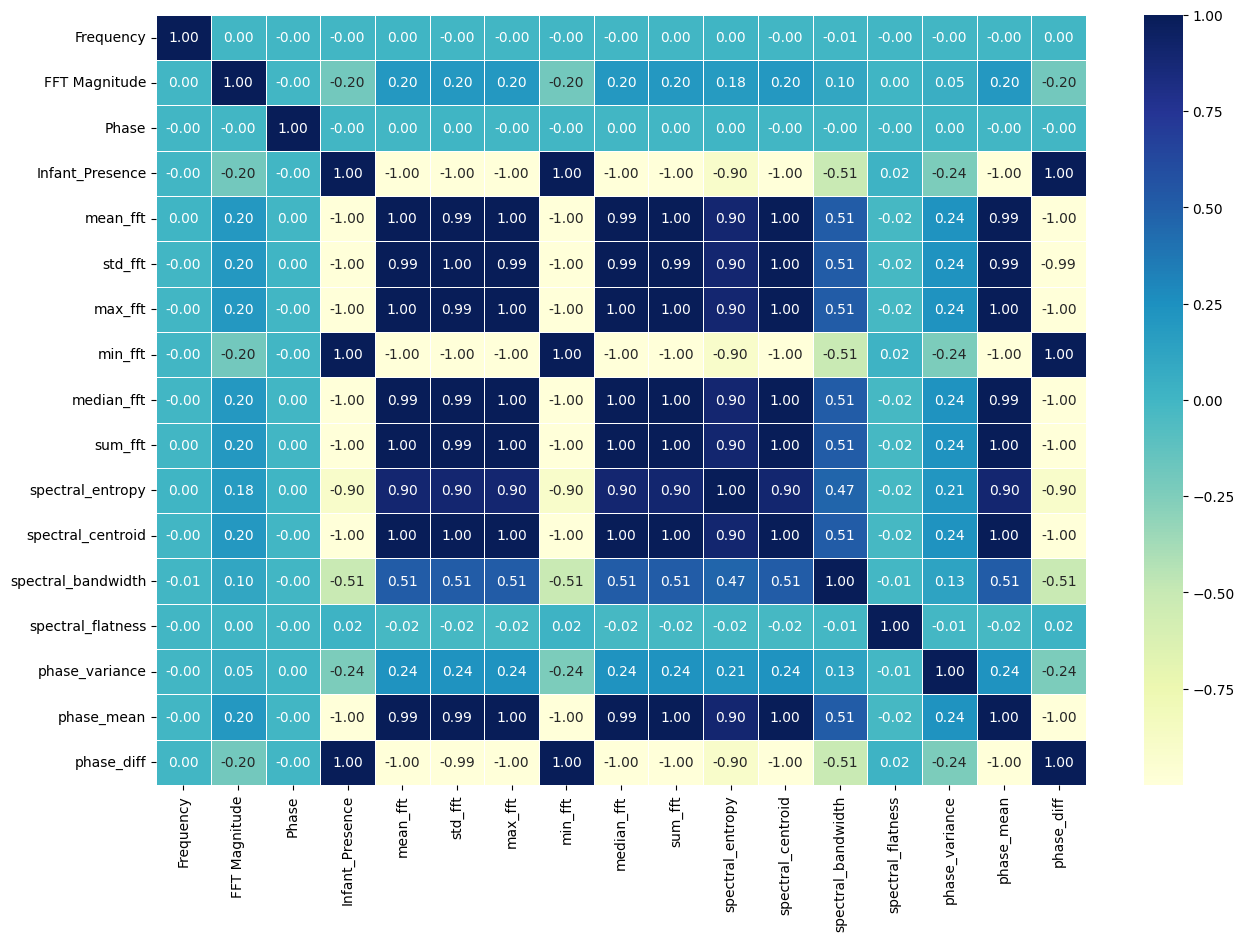

In [42]:
# Plotting correlation matrix for extracted features
corr_matrix = dataset_2_withfeatures.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')



In [43]:
# Set a threshold for correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)

# Create a set to store the columns to drop
to_drop = set()

# Loop through the indices of the highly correlated pairs
for i, j in zip(*highly_correlated):
    if i != j:  # Avoid diagonal (self-correlation)
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        # Ensure we do NOT drop 'Object_Presence'
        if feature_j != "Infant_Presence":
            to_drop.add(feature_j)  # Drop one of the correlated features

# Drop the highly correlated features from the dataframe
dataset_2_reduced = dataset_2_withfeatures.drop(columns=to_drop)

# Display the dropped features and new dataframe shape
print("Dropped features: ", to_drop)
print("New dataframe shape: ", dataset_2_reduced.shape)


Dropped features:  {'phase_mean', 'mean_fft', 'sum_fft', 'spectral_centroid', 'std_fft', 'max_fft', 'median_fft', 'min_fft', 'phase_diff', 'spectral_entropy'}
New dataframe shape:  (37000, 7)


In [44]:
dataset_2_reduced

,Frequency,FFT Magnitude,Phase,Infant_Presence,spectral_bandwidth,spectral_flatness,phase_variance
0,0.000000,104749.366658,0.000000,0.0,578588.615467,0.831930,3.382215
1,78.125000,52421.282760,-3.130457,0.0,590142.948552,0.801256,3.271457
2,156.250000,2858.080997,1.630063,0.0,576804.024543,0.804053,3.361590
3,234.375000,2785.146203,-0.997409,0.0,590322.046495,0.828605,3.370942
4,312.500000,1836.985949,2.804369,0.0,574821.322613,0.785846,3.282156
...,...,...,...,...,...,...,...
36995,-813.802083,1362.883093,0.664906,1.0,570894.904122,0.789512,3.184503
36996,-651.041667,1026.975587,-2.278972,1.0,551628.080117,0.805885,3.179829
36997,-488.281250,759.834659,1.668255,1.0,555650.268083,0.798295,3.223634
36998,-325.520833,1716.246635,-0.987059,1.0,557639.954175,0.789621,3.322887


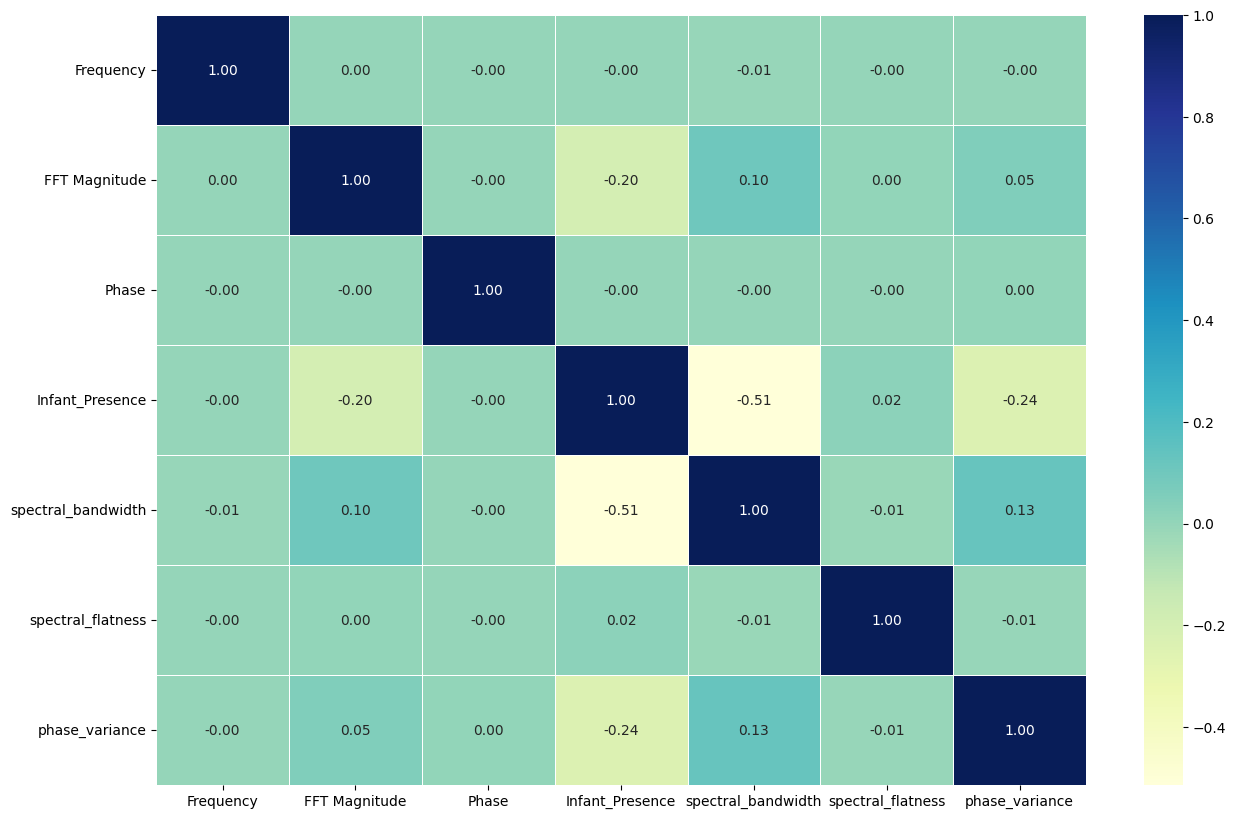

In [45]:
corr_matrix = dataset_2_reduced.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')

# XG BOOST with selected features using Correlation matrix

In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (df_combined)
X = dataset_2_reduced.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_reduced['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for selected features data:\n", classification_report(y_test, y_pred))



Accuracy: 0.8178378378378378

Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4978
         1.0       0.76      0.66      0.70      2422

    accuracy                           0.82      7400
   macro avg       0.80      0.78      0.79      7400
weighted avg       0.81      0.82      0.81      7400



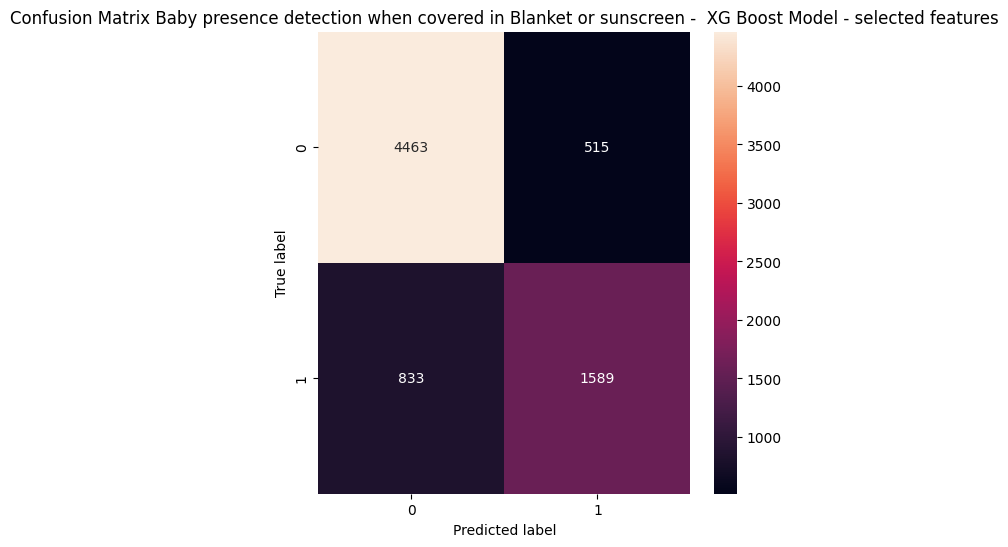

In [47]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen -  XG Boost Model - selected features')
plt.show()

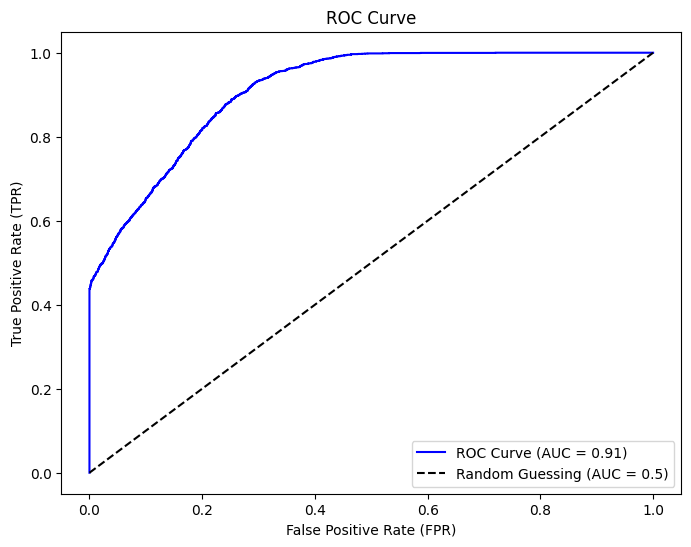

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
auc_score
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


/var/folders/0t/2wzx3xtd1ns5x1v0k6gxp2yc0000gn/T/ipykernel_86333/1275781998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


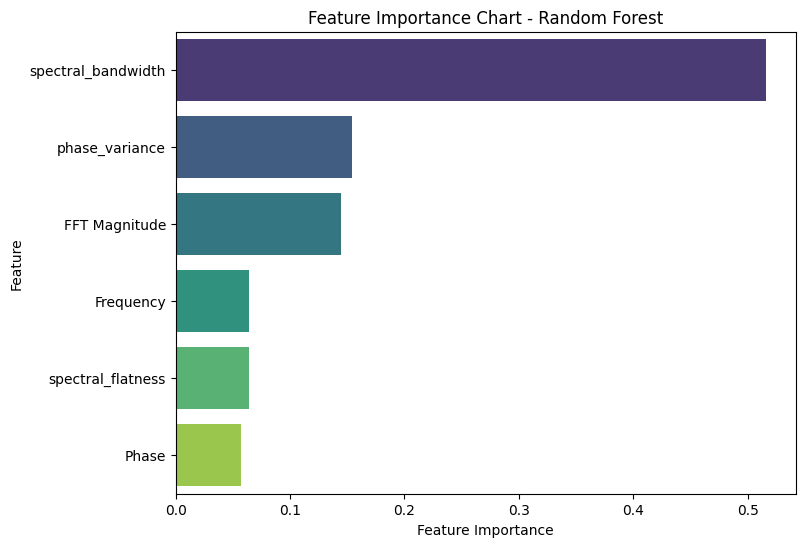

In [49]:
# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Chart - Random Forest")
plt.show()


In [50]:
import os
import joblib

# Save the trained XGBoost model
# clf.save_model('xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json')

# Save the scaler
# joblib.dump(scaler, 'xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Define save directories (2 levels up)
misc_dir = os.path.join("..", "..", "Misc")
model_dir = os.path.join("..", "..", "Models", "Baby Detection and Seat Classification XGBoost")


# Define file paths
model_path = os.path.join(misc_dir, "xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json")
scaler_path = os.path.join(model_dir, "xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl")

# --- Check and replace model ---
if os.path.exists(model_path):
    os.remove(model_path)
    print(f"Old model removed: {model_path}")

clf.save_model(model_path)
print(f"New model saved at: {os.path.abspath(model_path)}")

# --- Check and replace scaler ---
if os.path.exists(scaler_path):
    os.remove(scaler_path)
    print(f"Old scaler removed: {scaler_path}")

joblib.dump(scaler, scaler_path)
print(f"New scaler saved at: {os.path.abspath(scaler_path)}")


Old model removed: ../../Misc/xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json
New model saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Misc/xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json
Old scaler removed: ../../Models/Baby Detection and Seat Classification XGBoost/xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl
New scaler saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection and Seat Classification XGBoost/xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl


In [51]:

import xgboost as xgb

# Load the trained XGBoost model
#clf = xgb.XGBClassifier()
#clf.load_model('xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json')

# Load the scaler
#scaler = joblib.load('xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Example: Transform new data and make predictions
#X_new_scaled = scaler.transform(X_new)
#y_pred = clf.predict(X_new_scaled)


# Random Forest Model

In [52]:
# Random Forest Model with raw data

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_rawdata.drop('Infant_Presence',axis=1)
Y = dataset_2_rawdata['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for rawdata:", accuracy_score(y_test, y_pred))
print("Classification Report for rawdata:\n", classification_report(y_test, y_pred))

RanFor Accuracy for rawdata: 0.6921621621621622
Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.72      0.89      0.79      4978
         1.0       0.56      0.29      0.38      2422

    accuracy                           0.69      7400
   macro avg       0.64      0.59      0.59      7400
weighted avg       0.67      0.69      0.66      7400



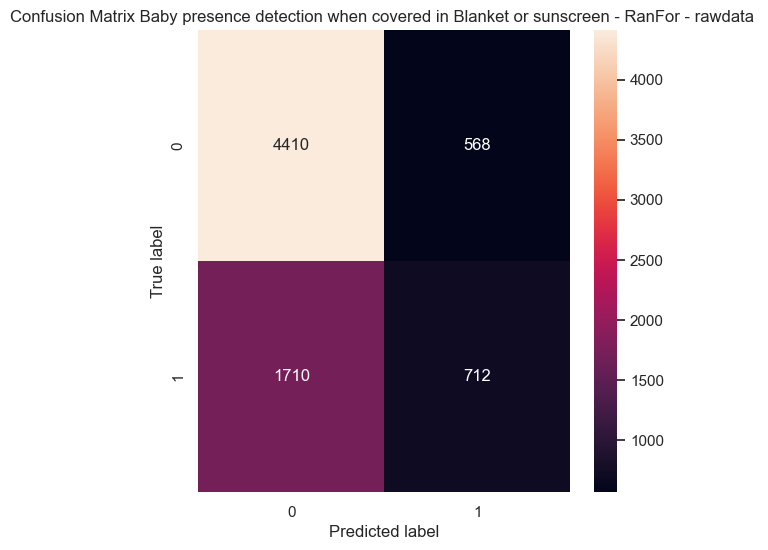

In [54]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - rawdata ')
plt.show()



In [55]:
# Random forest Model with extracted features data

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_withfeatures.drop('Infant_Presence',axis=1)
Y = dataset_2_withfeatures['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for extracted features data:", accuracy_score(y_test, y_pred))
print("Classification Report for extracted features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for extracted features data: 1.0
Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4978
         1.0       1.00      1.00      1.00      2422

    accuracy                           1.00      7400
   macro avg       1.00      1.00      1.00      7400
weighted avg       1.00      1.00      1.00      7400



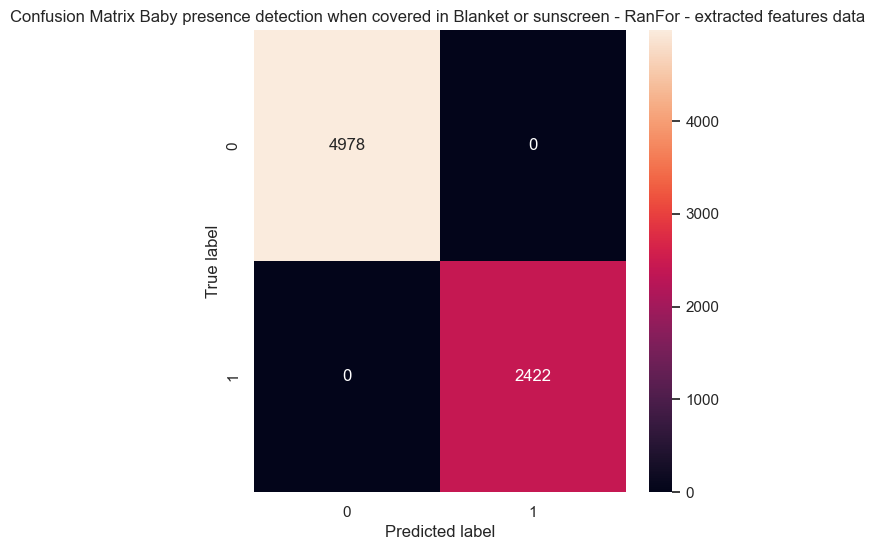

In [57]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - extracted features data ')
plt.show()

In [58]:
# Random forest Model with selected features data

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_reduced.drop('Infant_Presence',axis=1)
Y = dataset_2_reduced['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for selected features data:", accuracy_score(y_test, y_pred))
print("Classification Report for selected features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for selected features data: 0.8341891891891892
Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4978
         1.0       0.79      0.67      0.73      2422

    accuracy                           0.83      7400
   macro avg       0.82      0.79      0.80      7400
weighted avg       0.83      0.83      0.83      7400



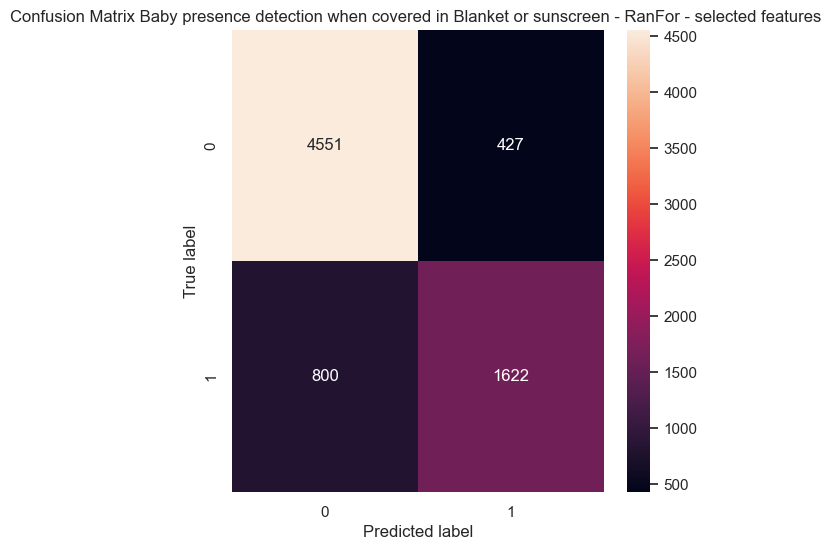

In [60]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - selected features ')
plt.show()


/var/folders/0t/2wzx3xtd1ns5x1v0k6gxp2yc0000gn/T/ipykernel_86333/1275781998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


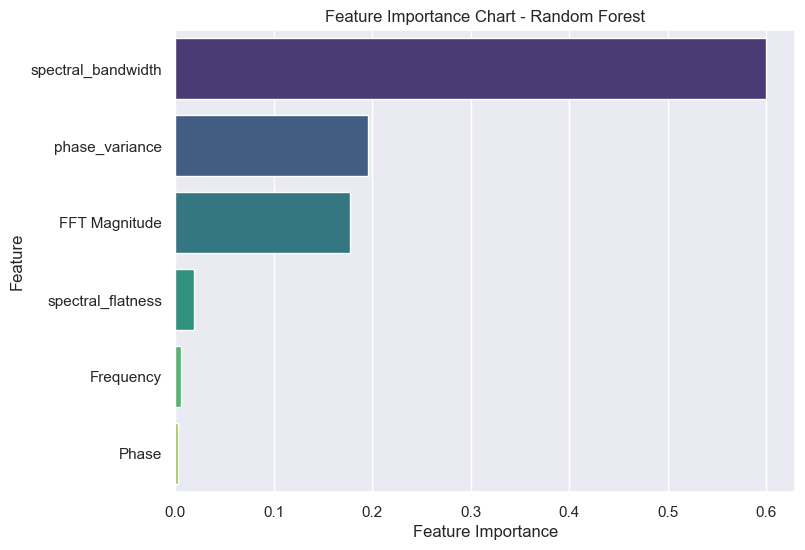

In [61]:
# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Chart - Random Forest")
plt.show()


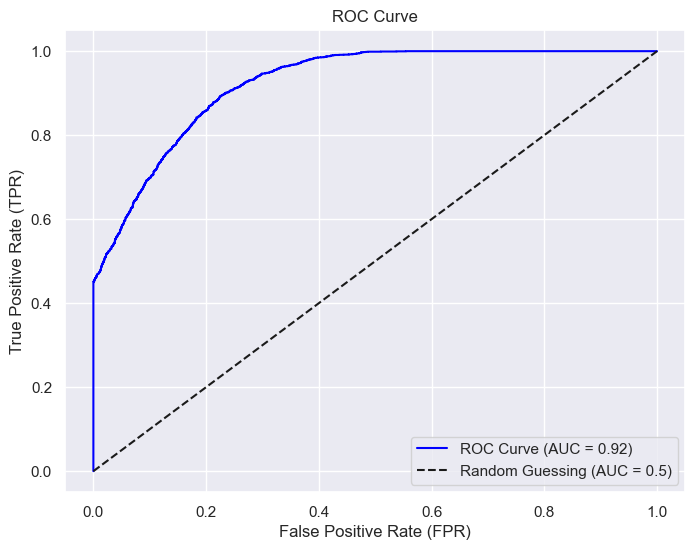

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
auc_score
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [63]:

import os
import joblib

# Save the model
# joblib.dump(clf, 'random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Define save directory (2 levels up -> Model/Baby Covered in Blanket Sunscreen)
model_dir = os.path.join("..", "..", "Models", "Baby Detection and Seat Classification Random Forest")

# Ensure directory exists
os.makedirs(model_dir, exist_ok=True)

# Define model path
model_path = os.path.join(model_dir, "random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl")

# --- Check and replace model ---
if os.path.exists(model_path):
    os.remove(model_path)
    print(f"Old model removed: {model_path}")

joblib.dump(clf, model_path)
print(f"New model saved at: {os.path.abspath(model_path)}")



Old model removed: ../../Models/Baby Detection and Seat Classification Random Forest/random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl
New model saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection and Seat Classification Random Forest/random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl
